In [ ]:
# Import Required Libraries

In [12]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
# Set seaborn style for plots

In [13]:
sns.set(style='whitegrid')

In [ ]:
# Connect to the adventure works new database

In [14]:
conn = sql.connect('adventure works new.db')

In [ ]:
# Define a function to run SQL queries and return DataFrame

In [26]:
def run_query(query): return pd.read_sql_query(query, conn)

In [ ]:
# Query to get product prices and sales quantities

In [36]:
query = ''' select ProductKey, ProductPrice, SUM(OrderQuantity) AS TotalQuantity
FROM Demographics_update
group by ProductKey
'''

In [38]:
price_quantity_data = run_query(query)

In [ ]:
# Calculate the Pearson correlation between ListPrice and TotalQuantity

In [40]:
correlation, p_value = pearsonr(price_quantity_data['ProductPrice'], price_quantity_data['TotalQuantity'])
print(f"Pearson Correlation: {correlation: .4f}, p-value: {p_value:.4f}")

Pearson Correlation: -0.3630, p-value: 0.0000


In [ ]:
# Interpret correlation result

In [42]:
if p_value < 0.05:
    print("There is a statistically significant correlation between price and quantity.")
else:
    print("There is no statistically significant correlation between price and quantity.")

There is a statistically significant correlation between price and quantity.


In [ ]:
# Linear regression analysis

In [44]:
x = price_quantity_data[['ProductPrice']]
y= price_quantity_data['TotalQuantity']
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
# Regresion coefficients

In [48]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

Intercept: 3264.754576162338
Slope: -1.2320999020498744


In [ ]:
# Predict values and plot the regression line

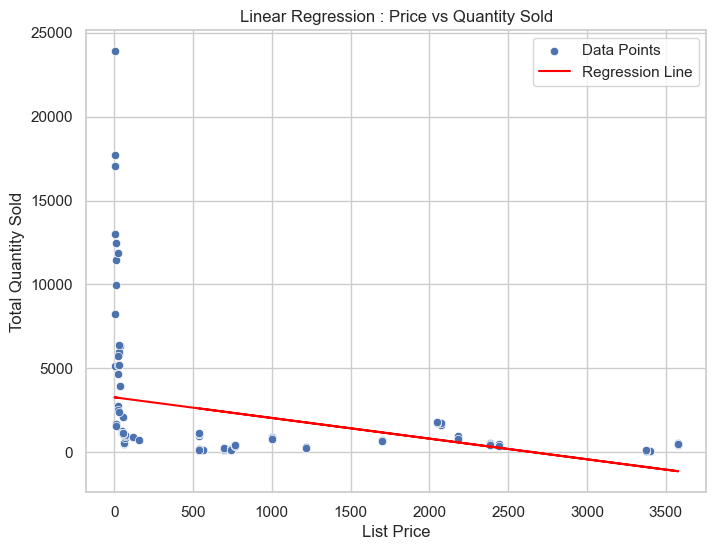

In [52]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x='ProductPrice', y='TotalQuantity', data=price_quantity_data, label='Data Points')
plt.plot(price_quantity_data['ProductPrice'], model.predict(x), color = 'red', label='Regression Line')
plt.title('Linear Regression : Price vs Quantity Sold')
plt.xlabel('List Price')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [ ]:
# Close connection

In [54]:
conn.close()